## Colorado Crime Data: Logistic, Lasso and Ridge Regressions:

> This dataset is from the same FBI site where the New York Crime data was taken from and represents the same data from Colorado.  Below, we investigate how Logistic, Lasso and Ridge Regressions work with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
col_list = ['Population', 'Violent_Crime', 'Murder', 'Rape', 'Rape_2', 'Robbery', 
            'Assault', 'Property_Crime', 'Burglary', 'Larceny', 'MV_Theft', 'Arson']

data = pd.read_excel('Colorado_2013_Crime.xls', names = col_list, header = 3, 
                     index_col = 0, skiprows = [0], skipfooter = 2).drop('Rape_2', 1)

In [55]:
# A bit of feature engineering:

# Making a Binary Violent Crime Column:
data.loc[data['Violent_Crime'] == 0, 'Binary_Violent_Crime'] = 0
data.loc[data['Violent_Crime'] > 0, 'Binary_Violent_Crime'] = 1

#Same for Murder, Rape, Property_Crime and Larceny:
data.loc[data['Larceny'] == 0, 'Binary_Larceny'] = 0
data.loc[data['Larceny'] > 0, 'Binary_Larceny'] = 1

data.loc[data['Murder'] == 0, 'Binary_Murder'] = 0
data.loc[data['Murder'] > 0, 'Binary_Murder'] = 1

data.loc[data['Rape'] == 0, 'Binary_Rape'] = 0
data.loc[data['Rape'] > 0, 'Binary_Rape'] = 1

data.loc[data['Property_Crime'] == 0, 'Binary_Property_Crime'] = 0
data.loc[data['Property_Crime'] > 0, 'Binary_Property_Crime'] = 1

In [56]:
# Doing non-binary feature engineering:

data['Larceny/Violent_Crime'] = data.Larceny / data.Violent_Crime
data['Property_Crime/Rape'] = data.Property_Crime / data.Rape

In [62]:
# Removing NaN and Inf values:

data.loc[data['Larceny/Violent_Crime'] == np.inf] = np.nan
data.loc[data['Property_Crime/Rape'] == np.inf] = np.nan
data = data.dropna(axis = 0, how = 'any')

### Variables and Models:

> After doing a bit of feature engineering, now we can start by defining our input data and our target variables - as well as defining and fitting our first models:

In [63]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score

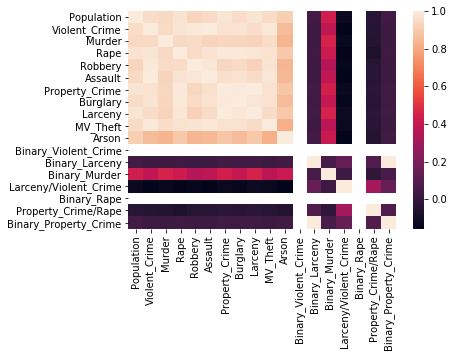

In [64]:
plt.show(sns.heatmap(data.corr()))

#### Predicting Murder:

In [114]:
x = data.drop('Binary_Murder', 1)
y = data.Binary_Murder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)

##### Logistic Regression:

In [171]:
log_regr1 = linear_model.LogisticRegression(max_iter = 200)

log_regr1.fit(X_train, y_train)
log_regr1.fit(X_test, y_test)

log1_train_score = log_regr1.score(X_train, y_train)
log1_test_score = log_regr1.score(X_test, y_test)

In [173]:
print("The cv scores are:\n{}".format(cross_val_score(log_regr1, x, y, cv = 10)))
print("The training score is: {}".format(log1_train_score))
print("The test score is: {}".format(log1_test_score))
print("The coefficients are:\n{}".format(log_regr1.coef_))

The cv scores are:
[0.8        0.9        0.9        0.88888889 0.66666667 1.
 1.         0.75       1.         1.        ]
The training score is: 0.676056338028169
The test score is: 1.0
The coefficients are:
[[-0.00056641 -0.384075    0.0392851  -0.15436832 -0.29134997  0.0223582
  -0.01276762  0.21120915  0.11004117 -0.33401795  0.02500339 -0.07016008
  -0.07016008 -0.17143199 -0.07016008 -0.13062295 -0.07016008]]


###### Ridge Regression:

In [174]:
# Coefficients above are pretty large - trying to get them a bit smaller:

ridge_regr1 = linear_model.LogisticRegression(penalty = 'l2', C = .8, max_iter = 200)

ridge_regr1.fit(X_train, y_train)
ridge_regr1.fit(X_test, y_test)

ridge1_train_score = ridge_regr1.score(X_train, y_train)
ridge1_test_score = ridge_regr1.score(X_test, y_test)

In [176]:
print("The cv scores are:\n{}".format(cross_val_score(log_regr1, x, y, cv = 10)))
print("The training score is: {}".format(ridge1_train_score))
print("The test score is: {}".format(ridge1_test_score))
print("The coefficients are:\n{}".format(ridge_regr1.coef_))

The cv scores are:
[0.7        0.9        0.9        0.77777778 0.66666667 0.77777778
 0.875      0.75       1.         1.        ]
The training score is: 0.6901408450704225
The test score is: 1.0
The coefficients are:
[[-0.00052597 -0.38193926  0.04239331 -0.17410639 -0.28226727  0.03204109
  -0.01839323  0.19755259  0.11642556 -0.33237139  0.03266464 -0.08402474
  -0.08402474 -0.22284115 -0.08402474 -0.11852344 -0.08402474]]


###### Lasso Regression:

In [177]:
# Coefficients for the first two models are the same - seeing if Lasso/L1 gets us anything different:

lasso_regr1 = linear_model.LogisticRegression(penalty = 'l1', C = .8)

lasso_regr1.fit(X_train, y_train)
lasso_regr1.fit(X_test, y_test)

lasso1_train_score = lasso_regr1.score(X_train, y_train)
lasso1_test_score = lasso_regr1.score(X_test, y_test)

In [179]:
# This looks much better:

print("The cv scores are:\n{}".format(cross_val_score(log_regr1, x, y, cv = 10)))
print("The training score is: {}".format(lasso1_train_score))
print("The test score is: {}".format(lasso1_test_score))
print("The coefficients are:\n{}".format(lasso_regr1.coef_))

The cv scores are:
[0.8        0.9        0.9        0.88888889 0.66666667 1.
 0.875      0.75       1.         1.        ]
The training score is: 0.6338028169014085
The test score is: 1.0
The coefficients are:
[[-0.00048001 -0.3166961   0.          0.         -0.20785783  0.
   0.02896906  0.15129569  0.04513896 -0.29523999  0.          0.
   0.          0.          0.         -0.12644104  0.        ]]
